<a href="https://colab.research.google.com/github/seungmindavid/Machine-Learning-2023/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Supervised Learning

Model: $y = f(x) + n$.

In our endeavor, our primary objective is to select an optimal model, denoted as $f(x)$, which endeavors to minimize the anticipated error. Specifically, we aim to ensure that the estimated values of $f(x_i)$ closely approximate the corresponding observed values, $y_i$, for all instances indexed by $i$. This pursuit is driven by the aspiration to enhance the predictive accuracy of our model, thereby facilitating more accurate and reliable predictions or inferences.

$\min_f \mathbb{E}_{x,y}[(f(x)-y)^2]$

- = Mean Squared Error (MSE): $\min_f \frac{1}{N}∑^N_{i=1}(f(x^i)-y^i)^2$

## Origin of MSE

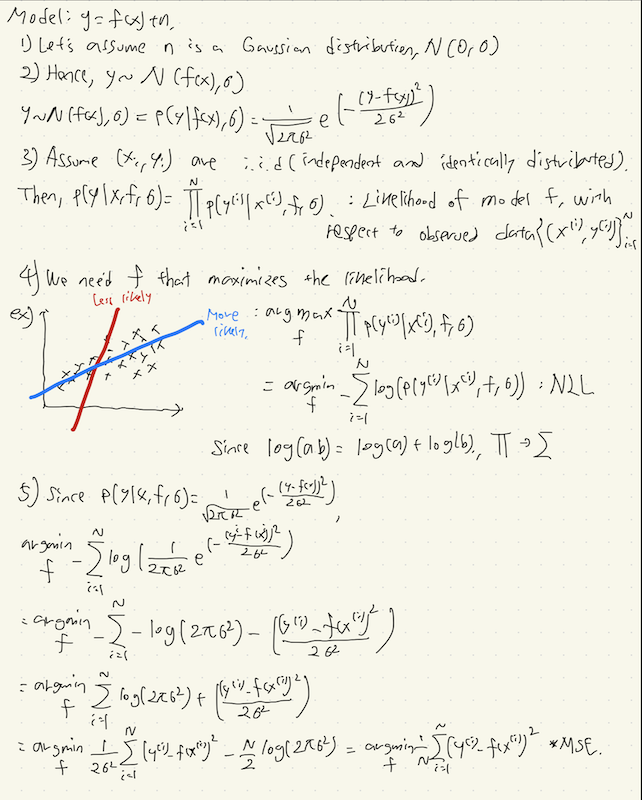

## Maximum A Posterior (MAP)

- $argmax_{Model}p(Model|Data) = argmax_{Model}\log(p(Model|Data))$

- $p(Data|Model)$ : Likelihood
- $p(Model)$ : Prior
- $p(Data)$ : Normalization
- $p(Model|Data)$ : Posterior

In linear regression, our regressor, f, is linear s.t $f(x) = w_1x + w_0$.

- Goal: $argmin_w ||Xw-y||^2$
- Loss: $||Xw-y||^2 = (Xw-y)^T(Xw-y) = w^TX^TXw - 2w^TX^Ty + y^Ty$
- Gradient: $\nabla_wL = 2X^TXw - 2X^Ty$
- At the optimal point, gradient should be vector zero, s.t. $\nabla_wL = 0 \Rightarrow w^* = (X^TX)^{-1}X^Ty$

- Hence, solution: $w^* = (X^TX)^{-1}X^Ty$

- What if $X^TX$ is not invertible (same as what if $X^TX$ is not full-rank)?: Use the Moore-Penrose Pseudoinverse: $w^* = (X^TX + λI)^{-1}X^Ty$, where $I$ is the identity matrix and $λ$ is a small scalar.

Linear Regression - Gradient Descent

- In the context of datasets characterized by a high dimensionality, where the feature space is represented as $X \in \mathbb{R}^d$, the challenge of matrix inversion may become manifest. To circumvent this issue and mitigate the computational complexities associated with direct matrix inversion, it is judicious to employ the Gradient Descent (GD) algorithm. By doing so, we can effectively navigate and optimize the model's parameters without requiring matrix inversion, thereby ensuring a more computationally efficient and scalable approach in high-dimensional data scenarios.
- Gradient Descent: Iteratively update parameters (W) to reach the optimal point.

- $w^{t} = w^{(t-1)}-ϵ\nabla_wL$, where ϵ is the learning rate.

- $\nabla_wL = 2X^TXw - 2X^Ty$

- $w^{t} = w^{(t-1)} - 2ϵ(X^TXw^{(t-1)}-X^Ty) = (I - \epsilon'X^TX)w^{(t-1)}+ϵ'X^Ty$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d


In [ ]:
train = df['train']
test = df['test']
N = len(train)

In [ ]:
y = train['y']
x1 = train['x1']
x2 = train['x2']
N = len(x1)
X = np.stack([np.ones(N), x1, x2], 1)
print('Matrix X is %d x %d'%X.shape)
print('Vector y is %d x 1'% y.shape)
w = np.matmul(np.linalg.inv(np.matmul(X.T,X)), np.matmul(X.T,y))
print('Vector w is %d x 1' % w.shape)



Matrix X is 500 x 3
Vector y is 500 x 1
Vector w is 3 x 1


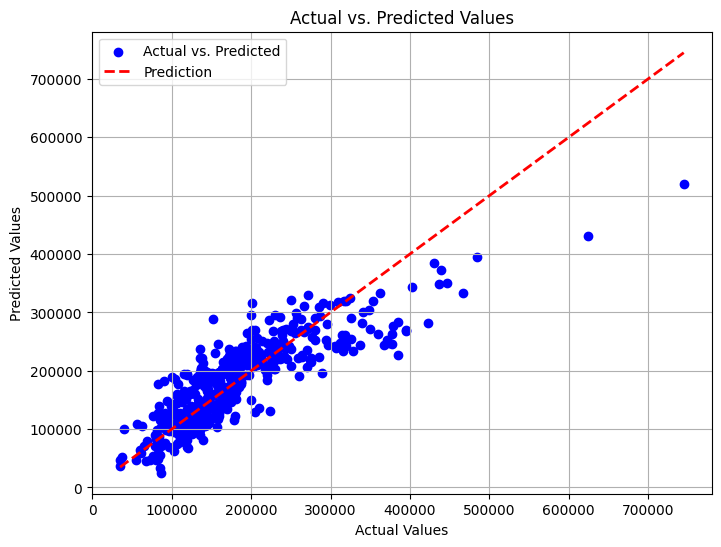

In [ ]:
y_predict = np.matmul(X,w)
# Create a scatter plot to visualize the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_predict, c='blue', label='Actual vs. Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2, label='Prediction')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()